In [2]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy
import string
import random
import string
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
def readGz(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)

In [4]:
def readCSV(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        u,b,r = l.strip().split(',')
        r = int(r)
        yield u,b,r

In [5]:
# Some data structures that will be useful

In [6]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [7]:
len(allRatings)
print(allRatings[0])

('u67805239', 'b61372131', 4)


In [8]:
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ItemPerUser = defaultdict(set)
UserPerItem = defaultdict(set)
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)

users = set()
books = set()
Entry_Train = defaultdict(int)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))
    ItemPerUser[u].add(b)
    UserPerItem[b].add(u)
    Entry_Train[(u,b)] = int(r)
    books.add(b)
    users.add(u)

In [9]:
Entry_Valid = []
#Pick a book randomly, maybe we do not need to one positive vs one negative
#we can make the number of nagative randomly
books = list(books)
for u,b,r in ratingsValid:
    Entry_Valid.append((u,b,1))
    index = random.randint(0, len(books)-1)
    while books[index] in ItemPerUser[u]:
        index = random.randint(0, len(books)-1)
    if books[index] in ItemPerUser[u]:
        print("error")
    Entry_Valid.append((u,books[index],0))
print(len(Entry_Valid))

20000


In [10]:
##Task1

In [11]:
### Would-read baseline: just rank which books are popular and which are not, and return '1' if a book is among the top-ranked
bookCount = defaultdict(int)
totalRead = 0

for user, book, _ in readCSV("train_Interactions.csv.gz"):
    bookCount[book] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0

In [12]:
#set thresholds
thresholds = [i/100 for i in range(1,101)]
accs = []
print(thresholds)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


In [13]:
for threshold in thresholds:
   return1 = set()
   count = 0
   for ic, i in mostPopular:
     count += ic
     return1.add(i)
     if count > totalRead*threshold: break
   acc = 0
   for u,b,gt in Entry_Valid:
     if b in return1:
          pre = 1
     else:
        pre = 0
     if pre == gt:
        acc +=1
     acc1 = acc/len(Entry_Valid)
   print(acc1)
   accs.append(acc1)

0.50615
0.51
0.51505
0.5197
0.52485
0.52875
0.53245
0.5367
0.54155
0.5452
0.55015
0.555
0.55825
0.56445
0.5682
0.5734
0.57845
0.58355
0.58835
0.5918
0.5957
0.6002
0.6056
0.6094
0.6147
0.6196
0.6238
0.6285
0.63235
0.63695
0.6409
0.6458
0.6493
0.65275
0.6566
0.66045
0.6634
0.6676
0.6714
0.67425
0.67895
0.68265
0.6855
0.6895
0.6929
0.69745
0.70125
0.7044
0.7082
0.71055
0.71315
0.71705
0.7205
0.7235
0.7262
0.7288
0.7304
0.73225
0.73475
0.73685
0.73905
0.74095
0.7428
0.7442
0.7458
0.7467
0.7472
0.74945
0.7505
0.7514
0.7538
0.75545
0.7552
0.755
0.75335
0.75295
0.7504
0.74865
0.74595
0.7427
0.74035
0.73765
0.73515
0.73105
0.7254
0.72045
0.71465
0.70745
0.7006
0.693
0.68375
0.6722
0.6598
0.64655
0.63305
0.61665
0.5963
0.575
0.54735
0.5


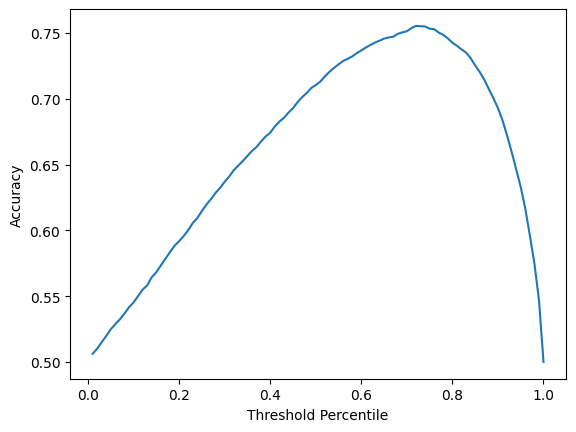

In [14]:
plt.xlabel("Threshold Percentile")
plt.ylabel("Accuracy")
plt.plot(thresholds, accs)

In [15]:
best_threshold = thresholds[accs.index(max(accs))]
print("My best accurate %f" % max(accs))
print("The best threshold is %f " %best_threshold)

My best accurate 0.755450
The best threshold is 0.720000 


In [16]:
def Jaccard(s1, s2):
    numerator = len(s1.intersection(s2))
    denominator = len(s1.union(s2))
    if(denominator == 0):
        return 0
    return numerator/denominator

In [17]:
def max_Jaccard(user, book):
    max_sim= 0
    for b_r in ItemPerUser[user]:
        sim = Jaccard(UserPerItem[book],UserPerItem[b_r])
        if sim > max_sim:
            max_sim = sim
    return max_sim
max_sim = {}
for u,b,_ in Entry_Valid:
    max_sim[(u,b)] = max_Jaccard(u, b)
print(max(max_sim.values()))

0.125


In [18]:
accs2 = []
thresholds2 = [i/10000 for i in range(1,101)]
#for i in range(1,11):
#    thresholds2.append(i/10)
print(thresholds2)

[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01]


In [19]:
for threshold in thresholds2:
   acc = 0
   for u,b,gt in Entry_Valid:
     pre = 0
     if max_sim[(u,b)] >= threshold:
        pre = 1
     if pre == gt:
        acc +=1
     acc2 = acc/len(Entry_Valid)
   print(acc2)
   accs2.append(acc2)

0.68445
0.68445
0.68445
0.68445
0.68445
0.68445
0.68445
0.68445
0.68445
0.68445
0.68525
0.6865
0.6888
0.68935
0.69105
0.69235
0.6941
0.6957
0.69585
0.69635
0.69825
0.6988
0.69925
0.7001
0.7011
0.70135
0.7009
0.70175
0.7017
0.70205
0.7017
0.7022
0.70205
0.702
0.7016
0.7014
0.70085
0.7007
0.70085
0.7003
0.69965
0.69945
0.69885
0.6985
0.69855
0.6975
0.69655
0.6952
0.6948
0.6943
0.6937
0.6936
0.69255
0.69175
0.69135
0.69025
0.6886
0.6871
0.68555
0.68365
0.6816
0.67985
0.6784
0.67615
0.674
0.67205
0.66925
0.6673
0.6639
0.66195
0.66025
0.65815
0.65635
0.65425
0.65315
0.6501
0.64875
0.6468
0.6439
0.64215
0.63965
0.63805
0.63665
0.63515
0.63215
0.62885
0.6259
0.62395
0.6223
0.6204
0.6183
0.61585
0.61425
0.61195
0.60965
0.608
0.6061
0.6045
0.6029
0.60055


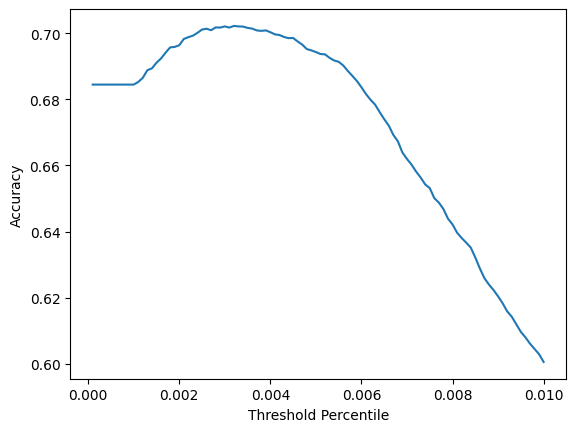

In [20]:
plt.xlabel("Threshold Percentile")
plt.ylabel("Accuracy")
plt.plot(thresholds2, accs2)

In [21]:
max_acc2 = max(accs2)
best_threshold2 = thresholds2[accs2.index(max(accs2))]
print("My best accurate %f" % max_acc2)
print("The best threshold is %f " %best_threshold2)

My best accurate 0.702200
The best threshold is 0.003200 


In [22]:
best_threshold = 0.7259
best_thresholds = [i/10000 for i in range(6000,8100)]
#best_threshold2 = 0.002930
#best_threshold2 = 0.032260
#best_threshold2 = 0.037040
best_threshold2 = 0.027030
best_threshold2s = [i/100000 for i in range(2001,4001)]

In [23]:
accs3 = []
for best_threshold in best_thresholds:
   return1 = set()
   count = 0
   for ic, i in mostPopular:
     count += ic
     return1.add(i)
     if count > totalRead*best_threshold: break
   acc = 0
   for u,b,gt in Entry_Valid:
     new_sim = max_sim[(u,b)]
     if b in return1 or new_sim >= best_threshold2:
         pre = 1
     else:
        pre = 0
     if pre == gt:
        acc +=1
     acc1 = acc/len(Entry_Valid)
   print(acc1)
   accs3.append(acc1)

0.7392
0.73915
0.73915
0.73915
0.7393
0.7393
0.7393
0.73955
0.73955
0.7395
0.7395
0.7395
0.73975
0.73975
0.73975
0.73985
0.73985
0.7397
0.7397
0.7397
0.73975
0.73975
0.73975
0.73985
0.73985
0.74
0.74
0.74
0.74025
0.74025
0.74025
0.74025
0.74025
0.7402
0.7402
0.7402
0.7402
0.7402
0.7402
0.7402
0.7402
0.74035
0.74035
0.74035
0.7402
0.7402
0.7402
0.7404
0.7404
0.7405
0.7405
0.7405
0.74055
0.74055
0.7407
0.7407
0.7407
0.7407
0.7407
0.7407
0.7407
0.7407
0.7407
0.7407
0.7407
0.7408
0.7408
0.741
0.741
0.741
0.741
0.741
0.741
0.7411
0.7411
0.7411
0.7411
0.7411
0.74125
0.74125
0.7413
0.7413
0.7413
0.74115
0.74115
0.74115
0.7413
0.7413
0.74135
0.74135
0.74135
0.7414
0.7414
0.7414
0.7414
0.7414
0.7414
0.7414
0.7414
0.74135
0.74135
0.74145
0.74145
0.74145
0.7413
0.7413
0.7413
0.7413
0.7413
0.74145
0.74145
0.74155
0.74155
0.74155
0.7415
0.7415
0.7415
0.7416
0.7416
0.74155
0.74155
0.74155
0.7415
0.7415
0.7415
0.7415
0.7415
0.74155
0.74155
0.74175
0.74175
0.74175
0.74175
0.74175
0.74175
0.74175
0.741

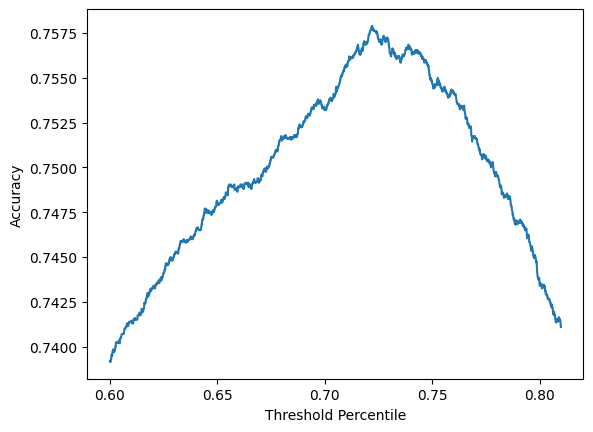

In [24]:
plt.xlabel("Threshold Percentile")
plt.ylabel("Accuracy")
plt.plot(best_thresholds, accs3)

In [25]:
max_acc3 = max(accs3)
best_threshold = best_thresholds[accs3.index(max(accs3))]
print("My best accurate %f" % max_acc3)
print("The best threshold is %f " % best_threshold)

My best accurate 0.757900
The best threshold is 0.721900 


In [26]:
accs3 = []
for best_threshold2 in best_threshold2s:
   return1 = set()
   count = 0
   for ic, i in mostPopular:
     count += ic
     return1.add(i)
     if count > totalRead*best_threshold: break
   acc = 0
   for u,b,gt in Entry_Valid:
     new_sim = max_sim[(u,b)]
     if b in return1 or new_sim >= best_threshold2:
         pre = 1
     else:
        pre = 0
     if pre == gt:
        acc +=1
     acc1 = acc/len(Entry_Valid)
   print(acc1)
   accs3.append(acc1)

0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.7573
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.75715
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.7571
0.757
0.757
0.757
0.757
0.757
0.757
0.757
0.757
0.757
0.757
0.757
0.757
0.757
0.757
0.757


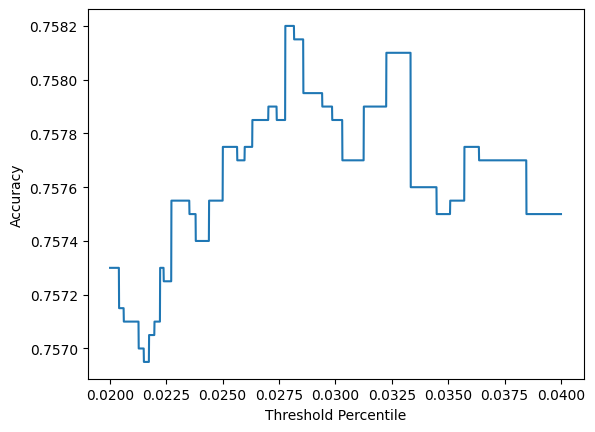

In [27]:
plt.xlabel("Threshold Percentile")
plt.ylabel("Accuracy")
plt.plot(best_threshold2s, accs3)

In [28]:
max_acc3 = max(accs3)
best_threshold2 = best_threshold2s[accs3.index(max(accs3))]
print("My best accurate %f" % max_acc3)
print("The best threshold is %f " % best_threshold2)

My best accurate 0.758200
The best threshold is 0.027780 


In [30]:
#write the predictions:
best_threshold1 = 0.73
#best_threshold1 = 0.7259
best_threshold2 = 0.026320
#best_threshold2 = 0.027030

return1 = set()
count = 0
for ic, i in mostPopular:
   count += ic
   return1.add(i)
   if count > totalRead*best_threshold1: break

predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
    if l.startswith("userID"):
        # header
        predictions.write(l)
        continue
    u, b = l.strip().split(',')
    jac = max_Jaccard(u, b)
    if b in return1 or new_sim >= best_threshold2:
       predictions.write(u + ',' + b + ",1\n")
    else:
       predictions.write(u + ',' + b + ",0\n")

predictions.close()

In [ ]:
##Task2

In [72]:
import numpy as np
import csv
import pandas as pd
import scipy
import scipy.optimize
from surprise import SVD, Reader, Dataset, accuracy, SVDpp
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV

In [73]:
def loadCSV(path):
    f = gzip.open(path, 'rt')
    c = csv.reader(f)
    header = next(c)
    dataset = []
    for line in c:
        d = dict(zip(header, line))
        dataset.append(d)
    return dataset

In [74]:
dataset = loadCSV('train_Interactions.csv.gz')
print(dataset[0])

{'userID': 'u67805239', 'bookID': 'b61372131', 'rating': '4'}


In [76]:
df = pd.DataFrame.from_dict(dataset)

In [77]:
temp_df = df
temp_df['user'] = temp_df['userID']
temp_df['item'] = temp_df['bookID']
temp_df['rating'] = temp_df['rating']

In [78]:
#reader = Reader(line_format='user item date rating', sep=',')
#data = Dataset.load_from_file("trainInteractions.csv", reader=Reader(sep=','))

data = Dataset.load_from_df(temp_df[['user', 'item', 'rating']], reader=Reader(rating_scale=(1, 5)))

In [ ]:
##SVD()

In [175]:
model = SVD()

In [176]:
trainset, validset = train_test_split(data, test_size=0.05)

In [177]:
model.fit(trainset)

In [180]:
predictions = model.test(validset)
accuracy.mse(predictions)

MSE: 1.4326


1.4326091924063349

In [181]:
predictions = open("predictions_Rating.csv", 'w')
for l in open("pairs_Rating.csv"):
    if l.startswith("userID"):
        #header
        predictions.write(l)
        continue
    u,i = l.strip().split(',')
    predictions.write(u + ',' + i + ',' + str(model.predict(u, i)[3]) + '\n')

predictions.close()

In [182]:
#With cross validation

In [188]:
model2 = SVD()

In [189]:
cross_validate(model2, data, measures=['MSE'], cv=5, verbose=True,)

Evaluating MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MSE (testset)     1.5258  1.4840  1.4759  1.5023  1.5037  1.4984  0.0174  
Fit time          1.51    1.30    1.31    1.30    1.34    1.35    0.08    
Test time         0.62    0.13    0.13    0.17    0.13    0.23    0.19    


{'test_mse': array([1.52582159, 1.48403897, 1.47591331, 1.50231715, 1.50368718]),
 'fit_time': (1.513336181640625,
  1.3002309799194336,
  1.3060009479522705,
  1.2967820167541504,
  1.342461347579956),
 'test_time': (0.621002197265625,
  0.12926816940307617,
  0.12664413452148438,
  0.16660618782043457,
  0.12615394592285156)}

In [190]:
accuracy.mse(model2.test(validset))

MSE: 0.7912


0.7912382744080565

In [201]:
predictions = open("predictions_Rating.csv", 'w')
for l in open("pairs_Rating.csv"):
    if l.startswith("userID"):
        #header
        predictions.write(l)
        continue
    u,i = l.strip().split(',')
    predictions.write(u + ',' + i + ',' + str(model2.predict(u, i)[3]) + '\n')

predictions.close()
#1.53962

In [202]:
#Gridsearch for SVD params

In [203]:
param_grid = {'n_epochs': [14, 15, 16, 17, 18, 19, 20, 22, 25], 'lr_all': [0.002, 0.003, 0.004, 0.005, 0.006],
              'reg_all': [0.01, 0.05, 0.1, 0.15, 0.21]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, joblib_verbose=5, n_jobs=-1)

In [194]:
gs.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 862 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:  3.3min finished


In [195]:
print(gs.best_score['rmse'])

1.208092574925447


In [196]:
print(gs.best_params['rmse'])

{'n_epochs': 25, 'lr_all': 0.006, 'reg_all': 0.21}


In [197]:
param_grid = {'n_epochs': [25,27,29,31,33,35], 'lr_all': [0.006, 0.007, 0.008, 0.009, 0.01],
              'reg_all': [0.28, 0.29, 0.3, 0.31, 0.32, 0.33]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, joblib_verbose=3, n_jobs=-1)

In [198]:
gs.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.4min finished


In [199]:
print(gs.best_score['rmse'])

1.2061579246445624


In [200]:
print(gs.best_params['rmse'])

{'n_epochs': 33, 'lr_all': 0.007, 'reg_all': 0.29}


In [2]:
model3 = SVD(n_epochs=33, lr_all= 0.007, reg_all= 0.33)

NameError: name 'SVD' is not defined

In [119]:
model3.fit(trainset)

In [120]:
accuracy.mse(model3.test(validset))

MSE: 1.4555


1.455466081218899

In [1]:
predictions = open("predictions_Rating.csv", 'w')
for l in open("pairs_Rating.csv"):
    if l.startswith("userID"):
        #header
        predictions.write(l)
        continue
    u,i = l.strip().split(',')
    predictions.write(u + ',' + i + ',' + str(model3.predict(u, i)[3]) + '\n')

predictions.close()
#1.4936200

NameError: name 'model3' is not defined

In [ ]:
#SVD++

In [131]:
param_grid = {'n_epochs': [14, 15, 16, 17, 18, 19, 20, 22, 25], 'lr_all': [0.002, 0.003, 0.004, 0.005, 0.006],
              'reg_all': [0.01, 0.05, 0.1, 0.15, 0.21]}
gs = GridSearchCV(SVDpp, param_grid, measures=['rmse'], cv=5, joblib_verbose=5, n_jobs=-1)

In [132]:
gs.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 862 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:  4.2min finished


In [136]:
print(gs.best_score['rmse'])

1.2062992866883424


In [137]:
print(gs.best_params['rmse'])

{'n_epochs': 25, 'lr_all': 0.006, 'reg_all': 0.21}


In [139]:
param_grid = {'n_epochs': [25,27,29,31,33,35], 'lr_all': [0.003, 0.004, 0.005, 0.006, 0.007, 0.008],
              'reg_all': [0.18, 0.21, 0.24, 0.27, 0.3, 0.33, 0.36]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, joblib_verbose=3, n_jobs=-1)

In [150]:
gs.fit(data)

[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  9.0min finished


In [151]:
print(gs.best_score['rmse'])

1.2055212170337974


In [152]:
print(gs.best_params['rmse'])

{'n_epochs': 39, 'lr_all': 0.006, 'reg_all': 0.33}


In [171]:
model4 = SVDpp(n_epochs=39, lr_all= 0.006, reg_all= 0.33)
model4.fit(trainset)
accuracy.mse(model4.test(validset))

MSE: 1.4541


1.4540699839343145

In [172]:
predictions = open("predictions_Rating.csv", 'w')
for l in open("pairs_Rating.csv"):
    if l.startswith("userID"):
        #header
        predictions.write(l)
        continue
    u,i = l.strip().split(',')
    predictions.write(u + ',' + i + ',' + str(model4.predict(u, i)[3]) + '\n')

predictions.close()
#1.48500

In [ ]:
#midterm

1.2061974308113896


{'n_epochs': 39, 'lr_all': 0.006, 'reg_all': 0.31}


MSE: 1.4543


1.4542639492717702